# Final Project 1 
Authors and Creators:

  1. Aliza Muslimah
  2. Padmadi Cahyo Wibowo
  3. Tegar Ahmad Arsy

## Objektif
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## Perkenalan
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang
digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

1. Latar belakang memilih kasus
ingin membangun sebuah model Regresi Linear yang bisa memprediksi harga Uber dan Lyft
2. Data penelitian
data ini bernama uber vs lyft Dataset Boston,MA yang diperoleh dari https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma. Data ini digunakan untuk memprediksi harga Uber dan Lyft .Data ini adalah data yang menyertakan data cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang cuaca yang berlokasi di Boston. Jumlah dataset ini adalah 693.071 baris data dengan 57 atribut. atribut yang menjadi label kelas yaitu price.

Deskripsi Atribut
Nama, penjelasan, serta tipe data dari atribut dataset, adalah sebagai berikut:

       1. id
       2. timestamp
       3. hour
       4. day
       5. datetime
       6. timezone
       7. source
       8. destination
       9. cab_type
       10. product_id
       11. name
       12. price
       13. distance
       14. surge_multiplier
       15. latitude
       16. longitude
       17. temperature
       18. apparentTemperature
       19. short_summary
       20. long_summary
       21. precipIntensity
       22. precipProbability
       23. humidity
       24. windSpeed
       25. windGust
       26. windGustTime
       27. visibility
       28. temperatureHigh
       29. temperatureHighTime
       30. temperatureLow
       31. temperatureLowTime
       32. apparentTemperatureHigh
       33. apparentTemperatureHighTime
       34. apparentTemperatureLow
       35. apparentTemperatureLowTime
       36. icon
       37. dewPoint
       38. pressure
       39. windBearing
       40. cloudCover
       41. uvIndex
       42. visibility.1
       43. ozone
       44. sunriseTime
       45. sunsetTime
       46. moonPhase
       47. precipIntensityMax
       48. uvIndexTime
       49. temperatureMin
       50. temperatureMinTime
       51. temperatureMax
       52. temperatureMaxTime
       53. apparentTemperatureMin
       54. apparentTemperatureMinTime
       55. apparentTemperatureMax
       56. apparentTemperatureMaxTime
  
3. Objective yang ingin dicapai

model prediksi harga yang dibentuk diharapkan dapat memberikan hasil akurasi yang maksimal. selain itu, model prediksi harga yang dibentuk mengaitkan dengan beberapa faktor yang mempengaruhi yaitu cab_type, car_type, distance, dan surge_multiplier.

## Install dan Import Pustaka yang dibutuhkan

In [1]:
'''Pustaka untuk pengolahan data'''
import pandas as pd
import numpy as np
from scipy import stats

'''Pustaka untuk proses machine learning dan data science'''
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut


# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif


# splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# modelling
from sklearn.linear_model import LinearRegression

# model performance
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit


'''Pustaka untuk Visualisasi'''
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


'''Pustaka Pendukung'''
# save models
import pickle

## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
# Loading data dengan Pandas
df_uber_asli = pd.read_csv('data1.zip', skipinitialspace=True)

In [3]:
# Menampilkan sekilas isi data
df_uber_asli

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
# Mengetahui dimensi data
df_uber_asli.shape

(693071, 57)

In [5]:
# Mengetahui daftar kolom
daftar_kolom = df_uber_asli.columns.values
print(daftar_kolom)

['id' 'timestamp' 'hour' 'day' 'month' 'datetime' 'timezone' 'source'
 'destination' 'cab_type' 'product_id' 'name' 'price' 'distance'
 'surge_multiplier' 'latitude' 'longitude' 'temperature'
 'apparentTemperature' 'short_summary' 'long_summary' 'precipIntensity'
 'precipProbability' 'humidity' 'windSpeed' 'windGust' 'windGustTime'
 'visibility' 'temperatureHigh' 'temperatureHighTime' 'temperatureLow'
 'temperatureLowTime' 'apparentTemperatureHigh'
 'apparentTemperatureHighTime' 'apparentTemperatureLow'
 'apparentTemperatureLowTime' 'icon' 'dewPoint' 'pressure' 'windBearing'
 'cloudCover' 'uvIndex' 'visibility.1' 'ozone' 'sunriseTime' 'sunsetTime'
 'moonPhase' 'precipIntensityMax' 'uvIndexTime' 'temperatureMin'
 'temperatureMinTime' 'temperatureMax' 'temperatureMaxTime'
 'apparentTemperatureMin' 'apparentTemperatureMinTime'
 'apparentTemperatureMax' 'apparentTemperatureMaxTime']


In [6]:
# Meihat tipe data setiap kolom
df_uber_asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya. 

In [7]:
#cek null values
df_uber_asli.isnull().sum().sort_values()

id                                 0
temperatureLow                     0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
ozone                              0
sunriseTime                        0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
temperatureHighTime                0
a

In [8]:
#Melihat data nan di kolom price
df_uber_asli['price'] 

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [9]:
# Mengcopy dataset asli 
data = df_uber_asli.copy()

In [10]:
print('Size before removing :',data.shape)

# Menghapus record yang memiliki null value di kolom price
data.dropna(inplace=True)

# Mereset index dataframe
data.reset_index(inplace=True, drop=True)
print('Size after removing :',data.shape)

Size before removing : (693071, 57)
Size after removing : (637976, 57)


In [11]:
# Melihat data
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
637971,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637972,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637973,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637974,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
637975,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


**Mengecek duplikasi data**

In [12]:
data['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [13]:
data['visibility.1'].head() 

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [14]:
# value di kolom visibility dan visibility.1 sama, maka drop salah satu kolom
data = data.drop(['visibility.1'],axis=1)  

In [15]:
# Untuk pemodelan ini, kita tidak memerlukan fitur terkait waktu/tanggal dan sistem koordinat sehingga kolom-kolom tersebut didrop

new_data = data.drop(['hour','day','month','id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime', 'longitude','latitude'],axis=1)

**Melihat Korelasi semua atribut terhadap atribut price**

In [16]:
# atribut yang terkait dengan temperature
temp_cols = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']
df_temp = new_data[temp_cols] 

#atribut yang terkait dengan cuaca
climate_cols = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_data[climate_cols] 

In [17]:
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


In [18]:
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

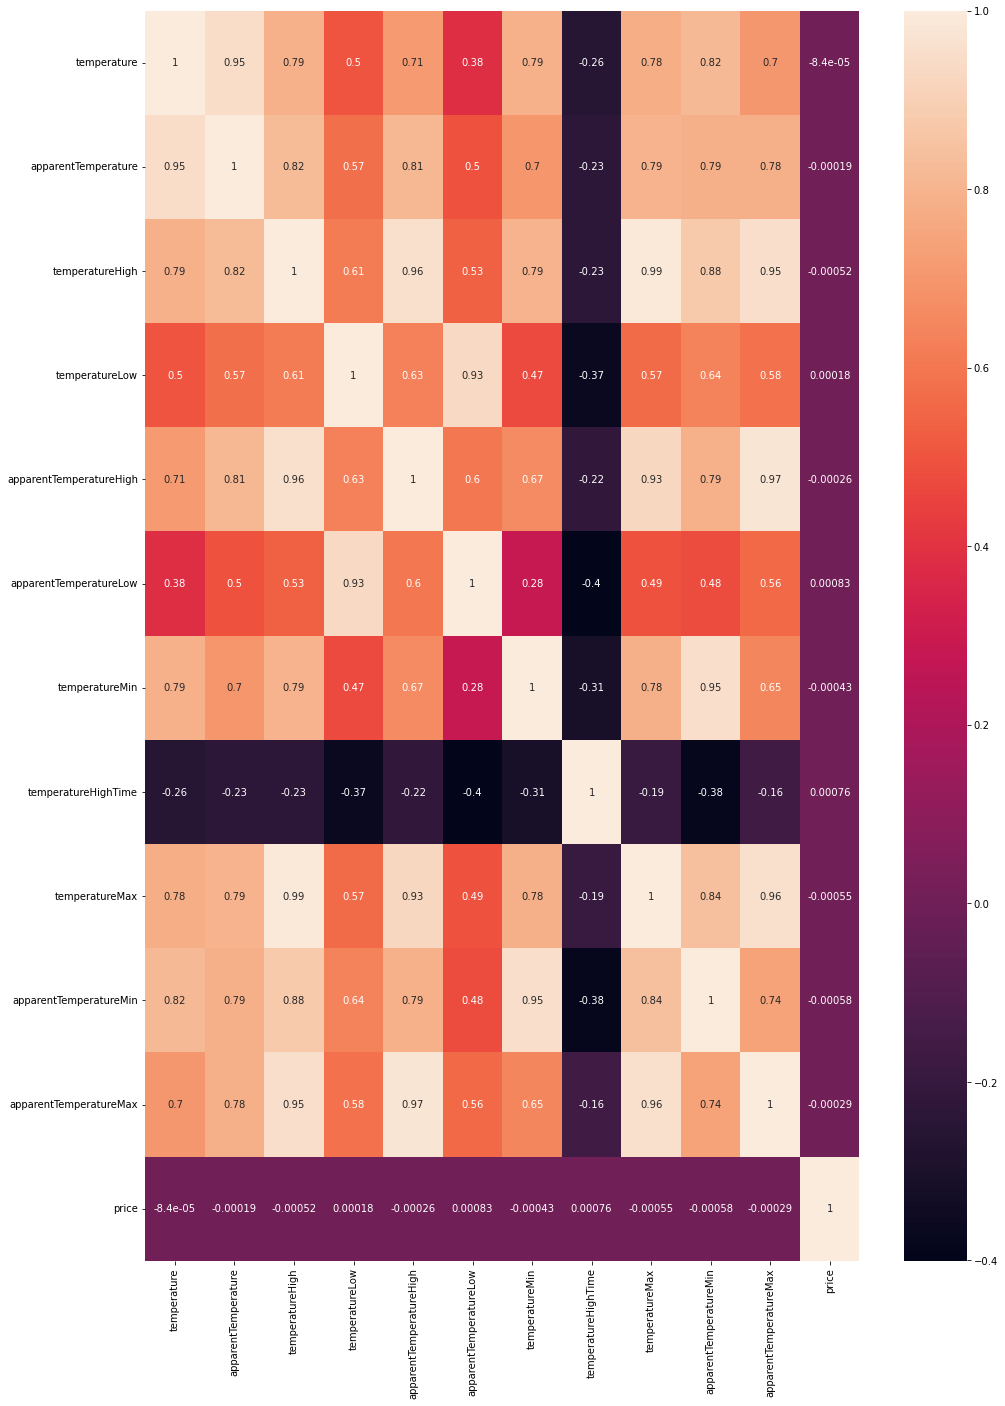

In [19]:
# Melihatkorelasi atribut di df_temp dengan atribut price
plt.figure(figsize=(16,23))
sns.heatmap(df_temp.corr(),annot=True) 

<AxesSubplot:>

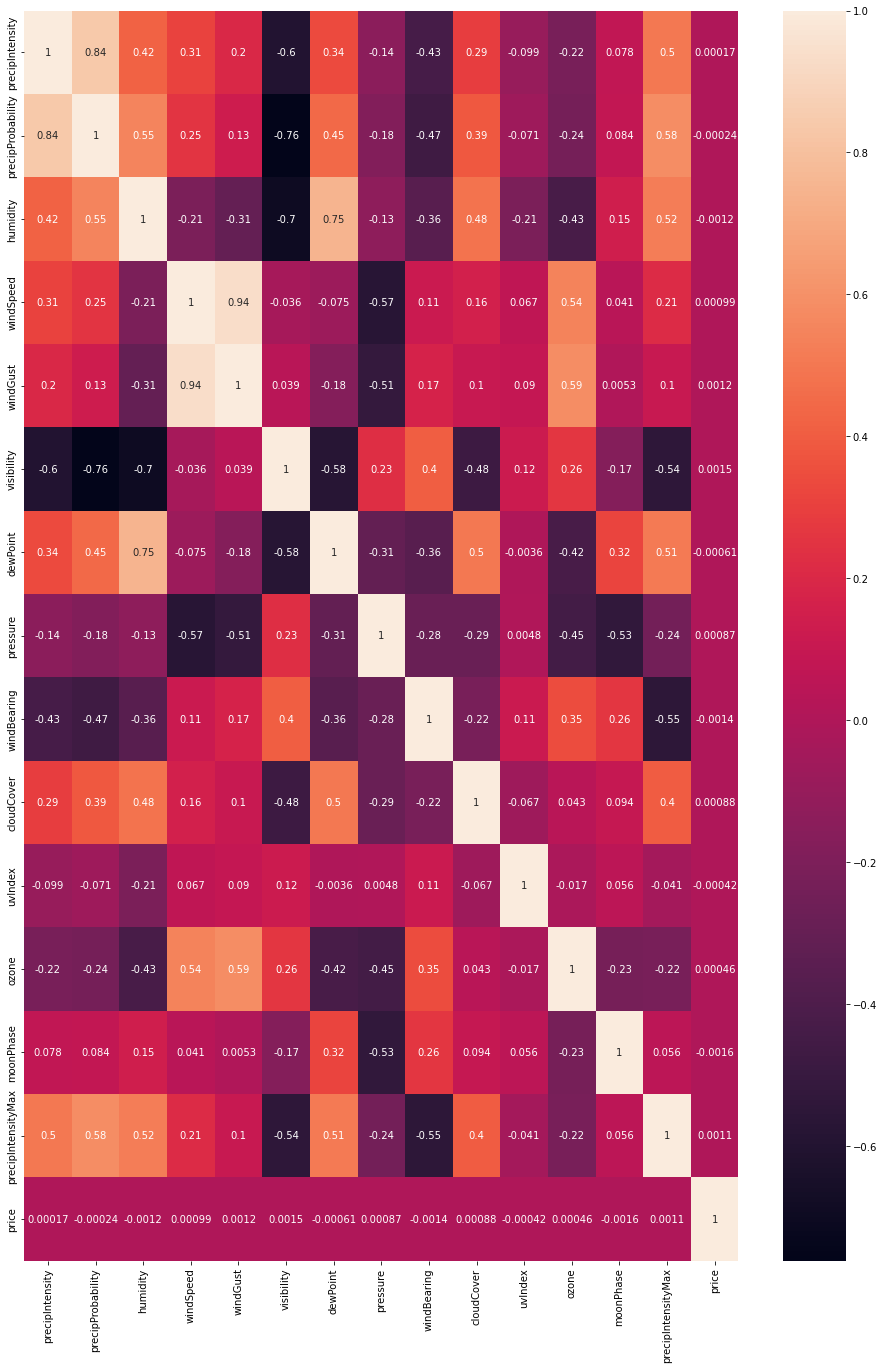

In [20]:
#Melihat korelasi dari atribut di df_clim dengan atribut price
plt.figure(figsize=(16,23))
sns.heatmap(df_clim.corr(),annot=True)  

Berdasarkan korelasi diatas, dapat disimpulkan bahwa baik atribut di temp_cols maupun di climate_cols memiliki korelasi yang lemah dengan atribut price. sehingga kolom-kolom tersebut dapat didrop

In [21]:
fresh_data = new_data.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)

In [22]:
fresh_data.head() 

,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [23]:
# Me-rename kolom name menjadi car_type
fresh_data.rename(columns={'name':'car_type'}, inplace=True)

In [24]:
fresh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timezone          637976 non-null  object 
 1   source            637976 non-null  object 
 2   destination       637976 non-null  object 
 3   cab_type          637976 non-null  object 
 4   product_id        637976 non-null  object 
 5   car_type          637976 non-null  object 
 6   price             637976 non-null  float64
 7   distance          637976 non-null  float64
 8   surge_multiplier  637976 non-null  float64
 9   short_summary     637976 non-null  object 
 10  icon              637976 non-null  object 
dtypes: float64(3), object(8)
memory usage: 53.5+ MB


In [25]:
# Melihat nilai unique dari kolom bertipe object

object_cols =  fresh_data.select_dtypes(include=['object','category']).columns.tolist()
for column in fresh_data[object_cols]:
    print(f'{column} : {fresh_data[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

car_type : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly 

Kita dapat melihat bahwa pada kolom timezone hanya memiliki 1 value dan kolom prduct_id memiliki value yang tidak terdefinisi maka dua kolom tersebut dapat didrop.

In [26]:
fresh_data = fresh_data.drop(['timezone','product_id'],axis=1) 

In [27]:
fresh_data.head()

,source,destination,cab_type,car_type,price,distance,surge_multiplier,short_summary,icon
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


**Encoding Data category**

In [28]:
category_cols = ['source','destination','cab_type','car_type','short_summary','icon', 'price']
new_cat = fresh_data[category_cols] 


le = preprocessing.LabelEncoder()

new_cat_encode = new_cat.copy()
for col in new_cat_encode.select_dtypes(include='O').columns:
    new_cat_encode[col]=le.fit_transform(new_cat_encode[col]) 

In [29]:
new_cat_encode

,source,destination,cab_type,car_type,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
637971,11,6,1,11,6,5,9.5
637972,11,6,1,10,6,5,13.0
637973,11,6,1,9,6,5,9.5
637974,11,6,1,1,6,5,27.0


<AxesSubplot:>

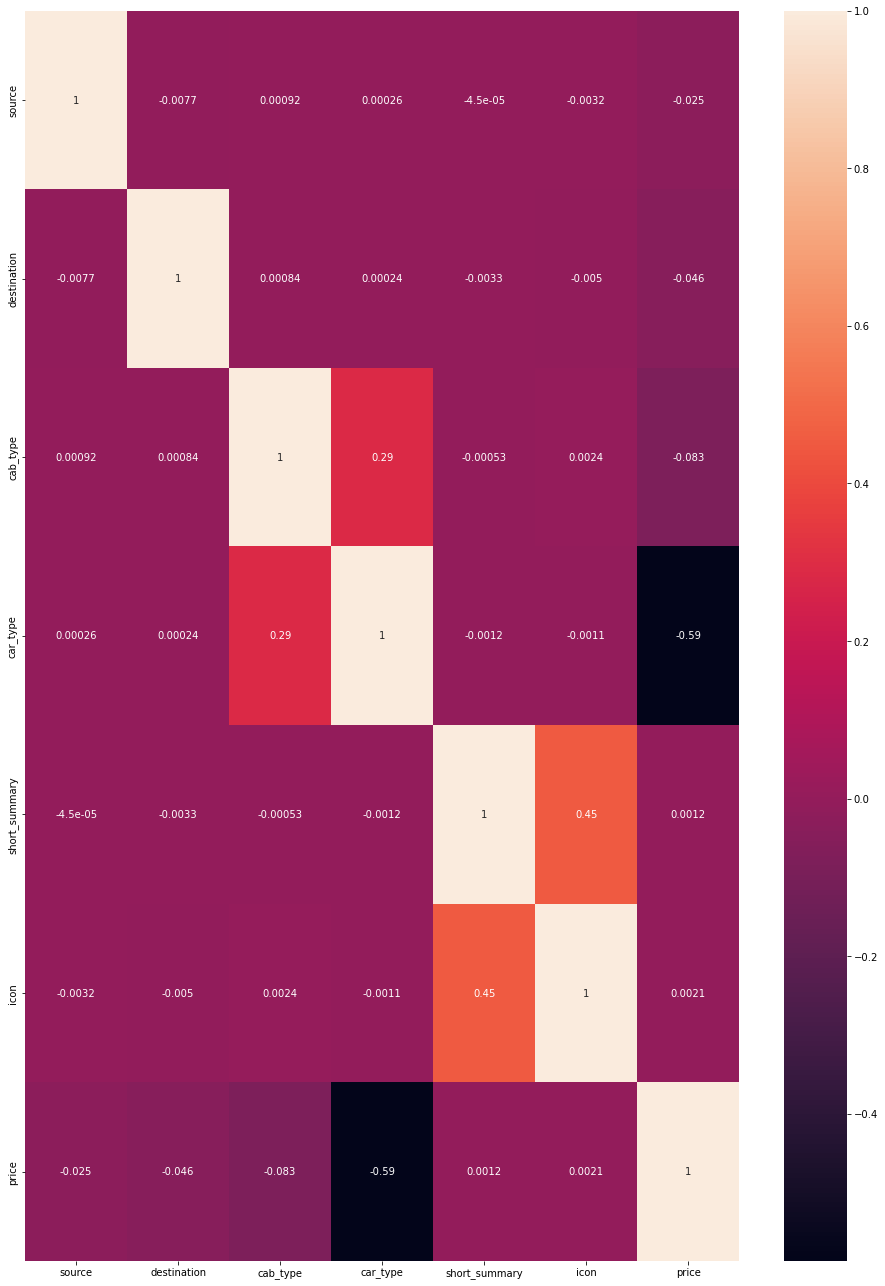

In [30]:
#Melihat koelasi antara atribut di new_cat_encode dengan atribut price
plt.figure(figsize=(16,23))
sns.heatmap(new_cat_encode.corr(),annot=True) 

Dapat dilihat bahwa korelasi dari atribut name mempunyai korelasi yang kuat dengan price, sedangkan atribut yang lain memiliki korelasi yang lemah. Sehingga atribut lain tersebut didrop kecuali cab_type karena memiliki korelasi yang kuat dengan kedua atribut lainnya.

In [31]:
unready_data = fresh_data.drop(['source','destination','short_summary','icon'],axis=1)
unready_data.head()    

,cab_type,car_type,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


## Explorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

<AxesSubplot:>

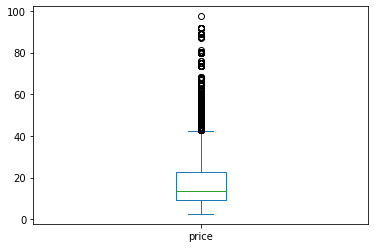

In [32]:
# Visualisasi kolom price dengan boxplot
unready_data['price'].plot(kind='box')

Diketahui terdapat outlier pada data price. maka perlu dilakukannya penghilangan outlier dengan IQR Method

In [33]:
qp12 = unready_data['price'].quantile(0.25)
qp32 = unready_data['price'].quantile(0.75) 
IQRp = qp32-qp12  

In [34]:
unready_data[unready_data['price']>(qp32+(1.5*IQRp))]

,cab_type,car_type,price,distance,surge_multiplier
645,Lyft,Lux Black,52.5,3.25,2.00
646,Lyft,Lux Black XL,67.5,3.25,2.00
706,Lyft,Lux Black XL,45.5,4.76,1.00
1005,Lyft,Lux Black XL,45.5,4.31,1.00
1210,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...
637394,Uber,Black SUV,47.0,5.56,1.00
637637,Lyft,Lux Black XL,52.5,4.58,1.25
637813,Lyft,Lux Black XL,47.5,5.42,1.00
637878,Uber,Black SUV,51.0,7.36,1.00


In [35]:
unready_data[unready_data['price']<(qp12-(1.5*IQRp))]

,cab_type,car_type,price,distance,surge_multiplier


Kita dapat melihat bahwa terdapat 5589 outliers. kita drop outliers tersebut 

In [36]:
print('Size before removing :',unready_data.shape)
unready_data= unready_data[~((unready_data['price']>(qp32+(1.5*IQRp))))]  
print('Size after removing :',unready_data.shape) 

Size before removing : (637976, 5)
Size after removing : (632387, 5)


<AxesSubplot:>

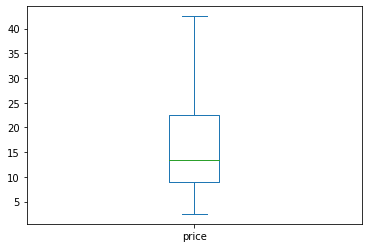

In [37]:
unready_data['price'].plot(kind='box')

## Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [38]:
# Mengubah type data object menjadi category lalu di lakukan encoding data
pre_data = unready_data.copy() 
pre_data['car_type'] = pre_data['car_type'].astype('category')
pre_data['cab_type'] = pre_data['cab_type'].astype('category')

pre_data['car_type'] = pre_data['car_type'].cat.codes 
pre_data['cab_type'] = pre_data['cab_type'].cat.codes   

In [39]:
pre_data.head() 

,cab_type,car_type,price,distance,surge_multiplier
0,0,7,5.0,0.44,1.0
1,0,2,11.0,0.44,1.0
2,0,5,7.0,0.44,1.0
3,0,4,26.0,0.44,1.0
4,0,6,9.0,0.44,1.0


In [40]:
ready_data = pre_data.copy()

In [41]:
# Split dataset ke features dan target
x = ready_data.drop(columns=['price'],axis=1).values
y = ready_data['price'].values

Data ini akan dibagi menjadi dua bagian 

  1. Data Latih (Training) = 70%
  2. Data Uji (Testing)    = 30%

In [42]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
# Standarisasi data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test) 

## Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter,
dan hal lain yang berkaitan.

**Definisi Model** : Model yang dipilih adalah Multiple Linear Regression. Kami memilih model tersebut karena data price memiliki korelasi kuat dengan lebih dari 1 variable sehingga jumlah atribut feature lebih dari 1. Variable-variable tersebut yaitu cab_type, car_type, distance, dan surge_multiplier.

In [43]:
# Pendefinisian model
lr = LinearRegression()

## Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [44]:
# FItting model
model = lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test) 

In [45]:
print(lr.coef_)
print(lr.intercept_)

[ 1.14882236 -5.60820972  2.85482516  1.0601444 ]
16.24825226466573


**Melihat koefisien masing-masing atribut**

In [46]:
X = ready_data.drop(columns=['price'],axis=1)
X.head()

,cab_type,car_type,distance,surge_multiplier
0,0,7,0.44,1.0
1,0,2,0.44,1.0
2,0,5,0.44,1.0
3,0,4,0.44,1.0
4,0,6,0.44,1.0


In [47]:
coef_dict = {
    'features': X.columns, 
    'coef_value': lr.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef 

,features,coef_value
0,cab_type,1.148822
1,car_type,-5.608210
2,distance,2.854825
3,surge_multiplier,1.060144


DataFrame diatas adalah nilai koefisien masing-masing atribut

In [48]:
# Output data yang dilatih
print(y_test)
print(y_pred_test) 

[30.  26.  17.5 ... 16.5  9.  13.5]
[17.29443381 28.33174391 12.97780886 ... 14.54401291 10.1221685
 11.42788257]


## Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model

In [49]:
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
 
print('r2_score : ',r2_score(y_test, y_pred_test))
print('MSE : ',mse)
print('RMSE : ',rmse)

r2_score :  0.5007805611665472
MSE :  38.5171578245833
RMSE :  6.206219285892443


In [50]:
# Mencari model terbaik dengan gridsearchcv
def best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

best_model_using_gridsearchcv(x,y) 

,model,best_score,best_params
0,linear_regression,0.498746,{'normalize': False}
1,lasso,0.461509,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964416,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Di sini kami mendapatkan model terbaik kami adalah decision tree regressor dengan r-kuadrat 0,964, lebih tinggi dari regresi linier kami sebelumnya.

## Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [51]:
# Melihat data sebelum dan sesudah encoding
print(unready_data['cab_type'])
print(ready_data['cab_type'])

0         Lyft
1         Lyft
2         Lyft
3         Lyft
4         Lyft
          ... 
637971    Uber
637972    Uber
637973    Uber
637974    Uber
637975    Uber
Name: cab_type, Length: 632387, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
637971    1
637972    1
637973    1
637974    1
637975    1
Name: cab_type, Length: 632387, dtype: int8


In [52]:
# Melihat data sebelum dan sesudah encoding
print(unready_data['car_type'])
print(ready_data['car_type']) 

0               Shared
1                  Lux
2                 Lyft
3         Lux Black XL
4              Lyft XL
              ...     
637971             WAV
637972          UberXL
637973           UberX
637974       Black SUV
637975        UberPool
Name: car_type, Length: 632387, dtype: object
0          7
1          2
2          5
3          4
4          6
          ..
637971    11
637972    10
637973     9
637974     1
637975     8
Name: car_type, Length: 632387, dtype: int8


Prediksi Harga

1. cab_type = 1 (Uber)
2. car_type = 1 (Black SUV)
3. distance = 1.00 
4. surge_multiplier = 1.0 

In [53]:
lr.predict([[1, 1, 1.00, 1.0]])

array([15.70383447])

DIperoleh harga prediksi Uber sebesar 15.70383447 

## Pengambilan Kesimpulan
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil
yang didapat dengan dibandingkan dengan objective yang sudah ditulis di
bagian pengenalan. 

In [54]:
best_model_using_gridsearchcv(x,y) 

,model,best_score,best_params
0,linear_regression,0.498746,{'normalize': False}
1,lasso,0.461509,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.964416,"{'criterion': 'mse', 'splitter': 'best'}"


model prediksi harga yang dibentuk dengan menggunakan beberapa faktor yang mempengaruhi yaitu cab_type, car_type, distance, dan surge_multiplier memiliki r-square sebesar 0.498746. Setelah kami mencari model terbaik dengan gridsearchcv, model terbaik yang diperoleh adalah decision tree regressor dengan r-square 0,964, lebih tinggi dari regresi linier kami sebelumnya.

In [55]:
# Menyimpan model di pickle
pickle.dump(lr, open('./model_classifier.pkl','wb'))